This script tests the difference between: <br>
A.) Subsetting then calculating pathway scores (what I originally did but is wrong because you can't see a difference in distributions) <br>
B.) Calculating pathway scores then subsetting (ideal)

In [1]:
#Load libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sspa


In [2]:
#Load the common cases dataset
df = pd.read_csv('Data/Su_COVID_metabolomics_processed_commoncases.csv', index_col=0)

In [3]:
#Trying to download latest version of Reactome (version 84)
reactome_pathways = sspa.process_gmt("Data/Reactome_Homo_sapiens_pathways_compounds_R84.gmt")

Subsetting into mild and severe, and then separately doing the pathway scores:

In [4]:
df_mild = (df[df["WHO_status"] == '1-2']) #45 samples, no need to remove the metadata, since I do that in a later step
df_severe = (df[(df["WHO_status"] == '3-4') | (df["WHO_status"] == '5-7')]) #83 samples

In [5]:
kpca_scores_mild = sspa.sspa_kpca(df_mild.iloc[:,:-2], reactome_pathways)
kpca_scores_severe = sspa.sspa_kpca(df_severe.iloc[:,:-2], reactome_pathways)

In [7]:
path_df = []

#Choosing random pathway
path = "R-HSA-1266738"

mild_path = kpca_scores_mild[path]
severe_path = kpca_scores_severe[path]

path_df = pd.concat([mild_path, severe_path], axis=1)
path_df.columns.values[0] = "mild"
path_df.columns.values[1] = "severe"

path_df


,mild,severe
sample_id,,
INCOV039,-0.423356,NaN
INCOV042,-0.536443,NaN
INCOV056,0.669674,NaN
INCOV057,0.711315,NaN
INCOV058,0.660288,NaN
...,...,...
INCOV133,NaN,0.652896
INCOV136,NaN,0.587251
INCOV137,NaN,-0.620091


<Axes: ylabel='Density'>

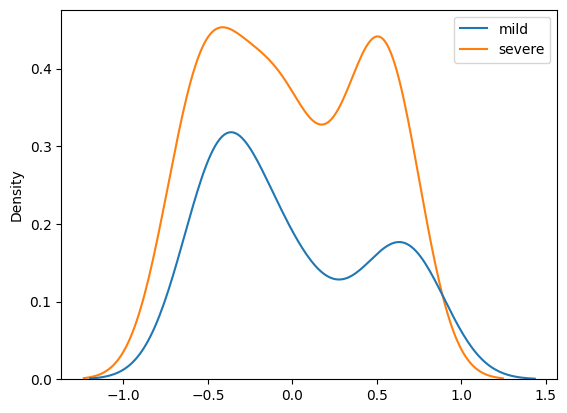

In [104]:
sns.kdeplot(data=path_df)

Calculating the pathway scores, then subsetting into mild and severe (ideal):

In [105]:
kpca_scores = sspa.sspa_kpca(df.iloc[:,:-2], reactome_pathways)
kpca_scores = pd.concat([kpca_scores, df.iloc[:,-2:]], axis=1)
kpca_scores

,R-HSA-110331,R-HSA-112310,R-HSA-112311,R-HSA-112315,R-HSA-112316,R-HSA-1237112,R-HSA-1266738,R-HSA-1368082,R-HSA-1368108,R-HSA-1428517,...,R-HSA-9717189,R-HSA-9717207,R-HSA-9734207,R-HSA-9735804,R-HSA-9748784,R-HSA-9749641,R-HSA-9753281,R-HSA-975634,WHO_status,Group
sample_id,,,,,,,,,,,,,,,,,,,,,
INCOV001,-0.376183,0.023789,0.470185,-0.028633,-0.028633,-0.230591,-0.156796,-0.156796,-0.156796,-0.164922,...,0.251727,-0.374152,-0.417449,0.039264,0.377174,-0.463495,-0.320570,-0.156796,3-4,COVID19
INCOV002,-0.311560,-0.092256,0.371911,-0.193472,-0.193472,0.380581,0.523125,0.523125,0.523125,-0.298485,...,0.293598,-0.321341,-0.078743,0.004789,-0.183342,0.690230,-0.284524,0.523125,5-7,COVID19
INCOV003,-0.308065,0.016257,0.605379,0.002243,0.002243,0.196997,0.294189,0.294189,0.294189,-0.180590,...,0.299947,0.319285,0.516905,-0.274521,-0.306369,0.527403,-0.469985,0.294189,5-7,COVID19
INCOV004,0.664277,0.165562,-0.112130,-0.001627,-0.001627,0.063758,0.289325,0.289325,0.289325,-0.332864,...,0.425024,-0.465348,-0.394084,0.679731,0.402184,-0.170759,-0.120595,0.289325,3-4,COVID19
INCOV005,0.265643,0.400127,-0.427878,0.285042,0.285042,0.133373,0.652853,0.652853,0.652853,0.136137,...,-0.108267,0.220742,-0.187237,0.374706,-0.006279,0.261147,-0.244730,0.652853,3-4,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INCOV135,-0.394520,0.259495,0.025824,0.226963,0.226963,-0.180511,0.444582,0.444582,0.444582,0.324441,...,-0.511849,0.513085,-0.316599,-0.115509,0.296053,-0.053170,-0.549767,0.444582,1-2,COVID19
INCOV136,-0.206822,0.033658,0.125002,0.085359,0.085359,0.674275,-0.663270,-0.663270,-0.663270,0.535411,...,-0.436924,0.379013,0.524433,-0.306521,0.266054,-0.285025,-0.554492,-0.663270,3-4,COVID19
INCOV137,-0.342753,0.160082,0.205079,0.211039,0.211039,0.134428,0.417418,0.417418,0.417418,-0.580234,...,0.294597,-0.321731,0.106948,-0.337870,0.300932,-0.057217,-0.485134,0.417418,5-7,COVID19


In [106]:
kpca_mild = (kpca_scores[kpca_scores["WHO_status"] == '1-2']) #45 samples
kpca_mild_path = kpca_mild[path]

kpca_severe = (kpca_scores[(kpca_scores["WHO_status"] == '3-4') | (kpca_scores["WHO_status"] == '5-7')]) #83 samples
kpca_severe_path = kpca_severe[path]


In [107]:
path_df = pd.concat([kpca_mild_path, kpca_severe_path], axis=1)
path_df.columns.values[0] = "mild"
path_df.columns.values[1] = "severe"

<Axes: ylabel='Density'>

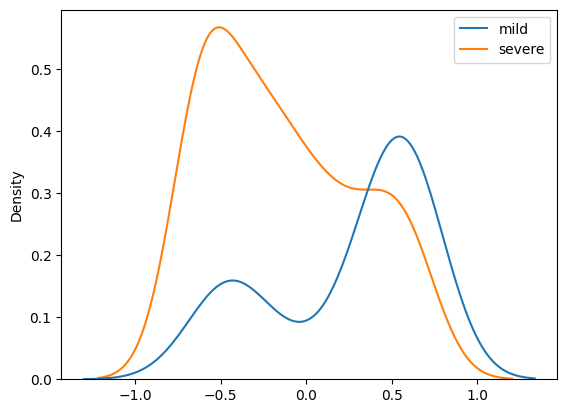

In [108]:
sns.kdeplot(data=path_df)